In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-revenue-prediction/train.csv.zip
/kaggle/input/restaurant-revenue-prediction/sampleSubmission.csv
/kaggle/input/restaurant-revenue-prediction/test.csv.zip


In [2]:
data=pd.read_csv('/kaggle/input/restaurant-revenue-prediction/train.csv.zip')
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [3]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [5]:
data.shape

(137, 43)

In [6]:
data.isnull().any()

Id            False
Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool

In [7]:
data.isnull().any().any()

False

* No categorical variables to encode.
* No null and missing values.

In [8]:
data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


### PreProcess

In [9]:
data.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [10]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


/tmp/ipykernel_32/1196628740.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.revenue, kde=True)


<Axes: xlabel='revenue', ylabel='Density'>

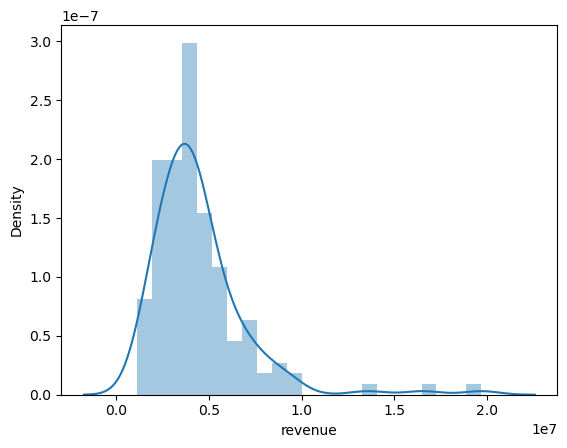

In [11]:
import seaborn as sns
sns.distplot(data.revenue, kde=True)

The output variable revenue is right skewed.
So,converting to snormal distribution by applying Box-Cox Transformation.

/tmp/ipykernel_32/598453383.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.revenue)


<Axes: xlabel='revenue', ylabel='Density'>

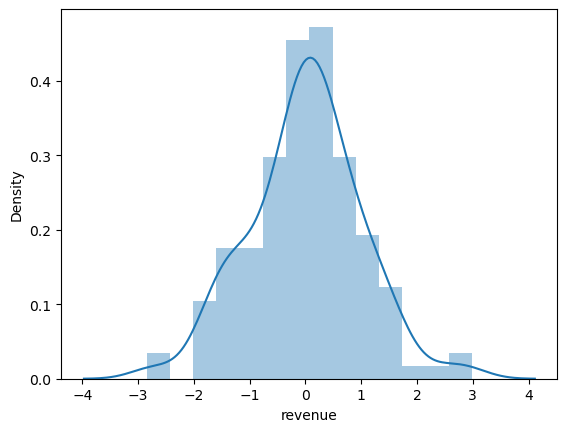

In [12]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer(method='box-cox')
data['revenue']=p.fit_transform(data[['revenue']])
import seaborn as sns
sns.distplot(data.revenue)

In [13]:
data['Open Date'] = pd.to_datetime(data['Open Date'], dayfirst=True)

/tmp/ipykernel_32/2408697066.py:1: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Open Date'] = pd.to_datetime(data['Open Date'], dayfirst=True)


In [14]:
from sklearn.preprocessing import LabelEncoder as LE
encoder = LE()
columns = list(data.columns)
for column in columns:
    if data[column].dtypes == 'object':
        data[column] = encoder.fit_transform(data[column])

In [15]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,31,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,0.776212
1,1,2008-02-14,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,1.168781
2,2,2013-09-03,10,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,-1.407363
3,3,2012-02-02,28,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,-0.800613
4,4,2009-09-05,14,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,0.231176


In [16]:
data.corr()

/tmp/ipykernel_32/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,1.000000,-0.023838,0.095422,-0.223427,-0.026351,-0.036991,-0.025033,-0.001914,0.010108,-0.025953,...,-0.041989,0.075148,-0.019252,0.055963,-0.019958,0.067714,0.003073,0.040799,-0.065791,0.022649
City,-0.023838,1.000000,-0.358040,0.061974,0.211984,0.267885,0.092918,0.020494,-0.171066,0.140273,...,0.022719,0.096654,0.099550,0.061590,0.053133,0.078641,0.052951,0.098472,0.091000,0.242009
City Group,0.095422,-0.358040,1.000000,-0.098585,-0.258556,-0.421095,-0.082172,-0.174134,0.019195,-0.416644,...,0.035497,-0.123097,-0.204542,-0.169750,-0.106115,-0.117024,-0.127973,-0.136617,-0.089976,-0.211258
Type,-0.223427,0.061974,-0.098585,1.000000,0.198231,0.150700,0.247365,0.057078,0.006765,0.127271,...,0.094343,0.539807,0.599333,0.524885,0.700818,0.520788,0.641135,0.574185,0.634963,-0.043214
P1,-0.026351,0.211984,-0.258556,0.198231,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,...,0.586532,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.117043
P2,-0.036991,0.267885,-0.421095,0.150700,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,...,0.322511,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.217585
P3,-0.025033,0.092918,-0.082172,0.247365,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,...,0.571525,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,0.025362
P4,-0.001914,0.020494,-0.174134,0.057078,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,...,0.452364,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.078641
P5,0.010108,-0.171066,0.019195,0.006765,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,...,0.306904,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,0.014541
P6,-0.025953,0.140273,-0.416644,0.127271,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,...,0.563415,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,0.174962


In [17]:
df = pd.DataFrame()
df['Open Date'] = data['Open Date']
df['City'] = data['City']
df['City Group'] = data['City Group']
df['Type'] = data['Type']
df['Revenue'] = data['revenue']

/tmp/ipykernel_32/3276673007.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


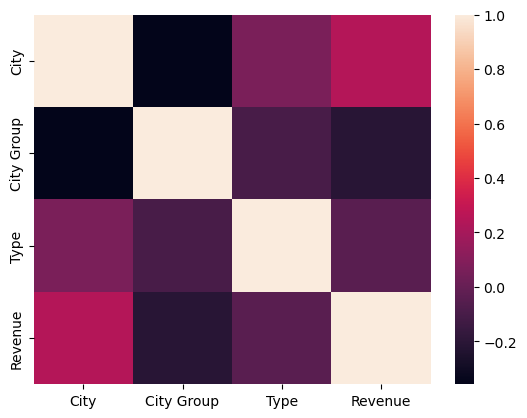

In [18]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr())
plt.show()

### Model Building

#### Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr_model = LinearRegression()
x = np.array(data['City'])
y = np.array(data['revenue'])
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
lr_model.fit(X_train,y_train)

LinearRegression()

In [20]:
print('Performance:\nTrain',lr_model.score(X_train,y_train),'\nTest:',lr_model.score(X_test,y_test))


Performance:
Train 0.03194663246759666 
Test: 0.09377581865188878


#### Multiple Linear Regression

In [21]:
data=data.drop(['Open Date','Id'],axis=1)
data.head(2)

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,31,0,2,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,0.776212
1,3,0,1,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,1.168781


In [22]:
mlr_model = LinearRegression()
x = np.array(data.drop(['revenue'],axis=1))
y = np.array(data['revenue'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train = X_train


mlr_model.fit(X_train,y_train)

LinearRegression()

In [23]:
print('Performance:\nTrain',mlr_model.score(X_train,y_train),'\nTest:',mlr_model.score(X_test,y_test))

Performance:
Train 0.5092298899839147 
Test: -1.8983833242787003


#### Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=4
x = np.array(data['City'])
y = np.array(df['Revenue'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [25]:
print('Performance:\nTrain',polyreg.score(X_train,y_train),'\nTest:',polyreg.score(X_test,y_test))

Performance:
Train 0.1059950933492283 
Test: 0.1419133311931161


#### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
x = np.array(data.drop(['revenue'],axis=1))
y = np.array(data['revenue'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train = X_train
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [27]:
print('Performance:\nTrain',dt.score(X_train,y_train),'\nTest:',dt.score(X_test,y_test))

Performance:
Train 0.2382471403477313 
Test: 0.014069802365931472


#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [29]:
print('Performance:\nTrain',forest.score(X_train,y_train),'\nTest:',forest.score(X_test,y_test))

Performance:
Train 0.8199572885508845 
Test: 0.2560837201582167


In [30]:
forest.feature_importances_

array([0.10814391, 0.00877454, 0.01085119, 0.0804062 , 0.03385006,
       0.01731271, 0.01662478, 0.02196928, 0.03746246, 0.00582718,
       0.01761136, 0.00786609, 0.01355832, 0.0257088 , 0.03797981,
       0.00867883, 0.00699087, 0.00391538, 0.0035419 , 0.02473159,
       0.00412695, 0.02606482, 0.06038766, 0.03530886, 0.03462444,
       0.02693153, 0.00391076, 0.0152747 , 0.00384275, 0.01327488,
       0.13296555, 0.0797444 , 0.02931886, 0.00719748, 0.00482314,
       0.00268588, 0.00865844, 0.00557096, 0.00509987, 0.00838283])

In [31]:
importances = list(forest.feature_importances_)
features = data.drop('revenue', axis = 1)
feature_list = list(features.columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: P28                  Importance: 0.13
Variable: City                 Importance: 0.11
Variable: P1                   Importance: 0.08
Variable: P29                  Importance: 0.08
Variable: P20                  Importance: 0.06
Variable: P6                   Importance: 0.04
Variable: P12                  Importance: 0.04
Variable: P21                  Importance: 0.04
Variable: P2                   Importance: 0.03
Variable: P11                  Importance: 0.03
Variable: P19                  Importance: 0.03
Variable: P22                  Importance: 0.03
Variable: P23                  Importance: 0.03
Variable: P30                  Importance: 0.03
Variable: P3                   Importance: 0.02
Variable: P4                   Importance: 0.02
Variable: P5                   Importance: 0.02
Variable: P8                   Importance: 0.02
Variable: P17                  Importance: 0.02
Variable: P25                  Importance: 0.02
Variable: City Group           Importanc

In [32]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

important_indices = [feature_list.index('P28'), feature_list.index('City')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [33]:
rf_most_important.fit(train_important, y_train)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)

In [34]:
print('Performance:\nTrain',rf_most_important.score(train_important,y_train),'\nTest:',forest.score(X_test,y_test))

Performance:
Train 0.4806511157261504 
Test: 0.2560837201582167


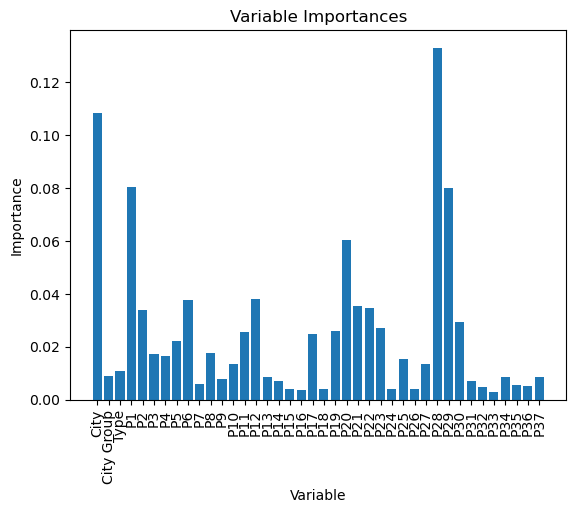

In [35]:
import matplotlib.pyplot as plt

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')

plt.xticks(x_values, feature_list, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');